<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Máquinas de aprendizaje aplicadas a la medicina
---
En primera instancia, se cargan los datos a trabajar en un *dataframe* de pandas, expresando las variables categóricas en su estructura original.

In [0]:
import pandas as pd
import numpy as np

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')

df.loc[df['sex'] == 0, 'sex'] = 'female'
df.loc[df['sex'] == 1, 'sex'] = 'male'
df.loc[df['chest_pain'] == 1, 'chest_pain'] = 'typical angina'
df.loc[df['chest_pain'] == 2, 'chest_pain'] = 'atypical angina'
df.loc[df['chest_pain'] == 3, 'chest_pain'] = 'non-anginal pain'
df.loc[df['chest_pain'] == 4, 'chest_pain'] = 'asymptomatic'
df.loc[df['blood_s'] == 0, 'blood_s'] = 'lower than 120mg/ml'
df.loc[df['blood_s'] == 1, 'blood_s'] = 'greater than 120mg/ml'
df.loc[df['electro'] == 0, 'electro'] = 'normal'
df.loc[df['electro'] == 1, 'electro'] = 'ST-T wave abnormality'
df.loc[df['electro'] == 2, 'electro'] = 'left ventricular hypertrophy'
df.loc[df['angina'] == 0, 'angina'] = 'no'
df.loc[df['angina'] == 1, 'angina'] = 'yes'
df.loc[df['slope'] == 1, 'slope'] = 'upsloping'
df.loc[df['slope'] == 2, 'slope'] = 'flat'
df.loc[df['slope'] == 3, 'slope'] = 'downsloping'
df.loc[df['thal'] == 3, 'thal'] = 'normal'
df.loc[df['thal'] == 6, 'thal'] = 'fixed defect'
df.loc[df['thal'] == 7, 'thal'] = 'reversable defect'

df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).

**Respuesta:**

Para comenzar, se genera un resumen de los valores obtenidos para la media, desviación estándar y cuartiles del potencial boxplot que se generaría para cada atributo predictivo del dataset (hasta *vessel*), tanto para pacientes sanos como enfermos:


In [0]:
sanos = df[df.normal == 1].drop(['normal'], axis=1)
enfermos = df[df.normal == 2].drop(['normal'], axis=1)

print("Pacientes sanos:\n", sanos.describe(), "\n")
print("Pacientes enfermos:\n", enfermos.describe())

Pacientes sanos:
               age     blood_p       serum   max_heart     oldpeak      vessel
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000
mean    52.706667  128.866667  244.213333  158.333333    0.622667    0.286667
std      9.509830   16.457660   54.019085   19.283357    0.800851    0.648557
min     29.000000   94.000000  126.000000   96.000000    0.000000    0.000000
25%     45.000000  120.000000  209.000000  148.250000    0.000000    0.000000
50%     52.000000  130.000000  236.000000  161.000000    0.200000    0.000000
75%     59.000000  140.000000  268.750000  172.000000    1.175000    0.000000
max     76.000000  180.000000  564.000000  202.000000    4.200000    3.000000 

Pacientes enfermos:
               age     blood_p       serum   max_heart     oldpeak      vessel
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.000000
mean    56.591667  134.441667  256.466667  138.858333    1.584167    1.150000
std      8.116273   19.

Puede observarse que (...).

Ahora, el primer análisis gráfico que puede efectuarse, a partir de los datos obtenidos anteriormente, es el de la edad tanto de los pacientes sanos como de los enfermos. Para esto se observan los boxplots a continuación:

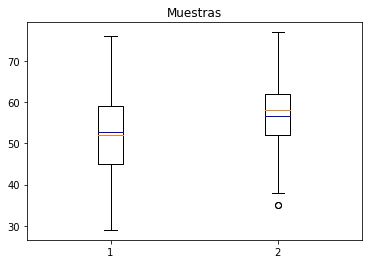

In [0]:
import numpy as np
import matplotlib.pyplot as plt

age_healthy = df['age'][df['normal'] == 1]
age_ill = df['age'][df['normal'] == 2]

data = [age_healthy, age_ill]
fig, ax = plt.subplots()
ax.set_title('Muestras')
meanlineprops = dict(linestyle='-', linewidth=1, color='blue')
ax.boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)

plt.show()

Luego, puede analizarse la presión sanguínea:

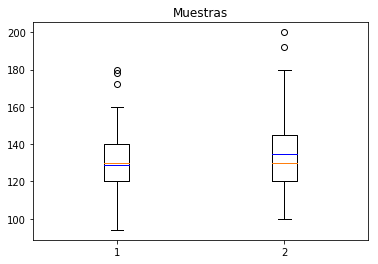

In [0]:
blood_p_healthy = df['blood_p'][df['normal'] == 1]
blood_p_ill = df['blood_p'][df['normal'] == 2]

data = [blood_p_healthy, blood_p_ill]
fig, ax = plt.subplots()
ax.set_title('Muestras')
meanlineprops = dict(linestyle='-', linewidth=1, color='blue')
ax.boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)

plt.show()

Luego, puede analizarse el colesterol sérico:

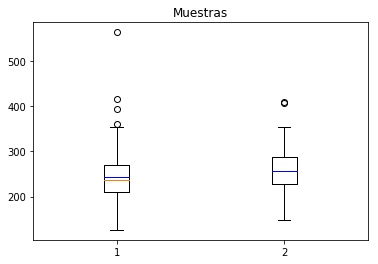

In [0]:
serum_healthy = df['serum'][df['normal'] == 1]
serum_ill = df['serum'][df['normal'] == 2]

data = [serum_healthy, serum_ill]
fig, ax = plt.subplots()
ax.set_title('Muestras')
meanlineprops = dict(linestyle='-', linewidth=1, color='blue')
ax.boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)

plt.show()

Luego, el ritmo cardíaco:

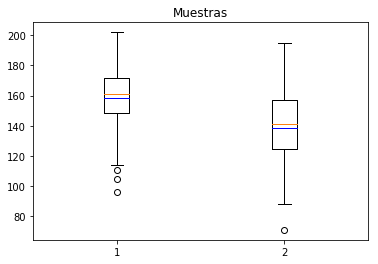

In [0]:
max_heart_healthy = df['max_heart'][df['normal'] == 1]
max_heart_ill = df['max_heart'][df['normal'] == 2]

data = [max_heart_healthy, max_heart_ill]
fig, ax = plt.subplots()
ax.set_title('Muestras')
meanlineprops = dict(linestyle='-', linewidth=1, color='blue')
ax.boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)

plt.show()

> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**

**Respuesta:**

En primera instancia, los algoritmos de ML utilizados para el desarrollo de esta tarea requieren de inputs y outputs de tipo numérico, por lo que la representación categórica *(aplicada en el punto anterior)* de las variables no es una opción.

Como se puede ver en el archivo *heart.dat*, las variables categóricas del dataset están representadas mediante valores enteros, lo cual podría causar cierta inestabilidad en los resultados del entrenamiento. Por ejemplo, si se entrenara el modelo sobre la variable *chest_pain* con las representaciones originales, se podría obtener diferentes resultados para la **función de pérdida** cuando dos predicciones incorrectas apuntan al mismo valor esperado, asumiendo cierto grado de jerarquía y/o cercanía entre los valores que puede tomar la variable, lo cual es incorrecto. Así, bajo la representación de *one hot vectors*, el clasificador puede re-dimensionar el espacio de variables, transformando a las variables categóricas como *"la presencia o no de cada valor posible"*.

In [0]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


### Predecir la presión sanguínea

En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.

**Respuesta:**

En el caso de la variable asociada a la enfermedad cardíaca, cuyos valores son $1$ ó $2$, tras extraerla, se resta una unidad a cada dato registrado, de manera tal que se pueda evaluar su comportamiento como si fuese una variable binaria:

In [0]:
data = df.copy()

class_label = data.pop("normal").values -1
reg_label = data.pop("blood_p").values
X_data = data.values


> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.

In [0]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

X_train = X_data[~mask_test] 
X_test = X_data[mask_test]

reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]

class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]

print("Train: ", X_train.shape)
print("Test: ", X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**.

In [0]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)

reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))

MSE train:  259.62929877777015
MSE test:  263.1851888628686


> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.

In [0]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=K)
mse_cv = 0

for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
    
mse_cv = mse_cv / K

NameError: name 'K' is not defined

> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa.

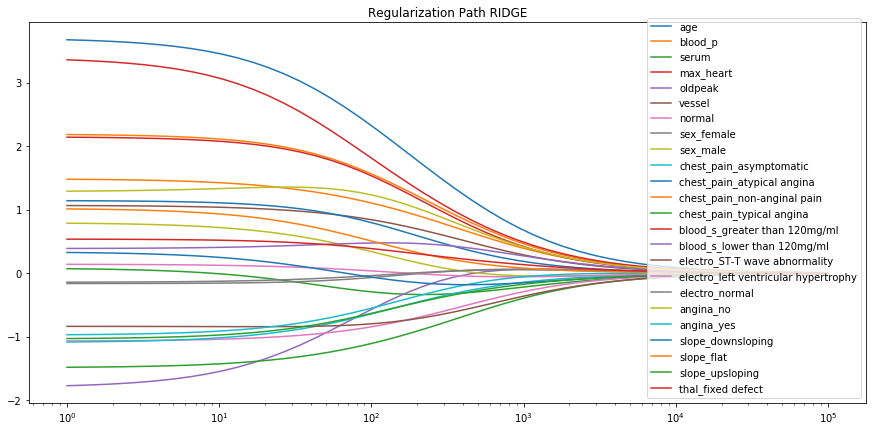

In [0]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

In [0]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
... #plot again

Ellipsis

> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?

In [0]:
from ipywidgets import interactive
def train_model(param):
    model = #define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))

> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

In [0]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]

> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?

In [0]:
D = #number of fake features
F = np.random.normal(loc = mu, scale = std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

SyntaxError: invalid syntax (<ipython-input-85-731831965cf8>, line 1)

### Detectar una enfermedad 
Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.
```python
mask_norm = class_label_train == 0 
model = #choose yor model..
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 
```

> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).
```python
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)
```

> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*
```python
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```

> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.
```python
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```

> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).
```python
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()
```

> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente
```python
from sklearn.decomposition import FastICA
...
```

> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

<a id="segundo"></a>
## 2. Estimación de edad de personas
El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.

<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) en el **objetivo** de predecir la **edad** (*target value*) de la persona presente en la imagen. Los datos corresponden a 3640 imágenes de rostros de personas extraídos de la plataforma Flickr, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de alto nivel, extraídas manualmente (no-aprendibles). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:
```python
import scipy.io as sio
mat_file = sio.loadmat("event.mat")
```
Mientras que para acceder a la información como tal:
```python
data = mat_file["trcoll"][0][0] # is "tecoll" for testing set
age_true = data[1] #target
...
genFeat = data[0]   # Contextual features
ffcoefs = data[3]   # Fisherface space
faceGist = data[4]  # GIST features
...
```

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

Existen distintas representaciones (descriptores) que usted podrá trabajar y entregársela como *input* a su modelo. Está la libertad de cómo desea trabajar este problema para detectar la edad de la persona, ya sea combinando los descriptores, teniendo un modelo para cada uno, definiendo rangos de edad o cualquier idea que se le ocurra. 

#### Importante
* Recuerde que el conjunto de pruebas está para evaluar su modelo final, **no puede tomar decisiones basadas en este conjunto**. *Sin embargo, Puede generar un conjunto de validación desde el conjunto de entrenamiento o utilizar validación cruzada*.

* La métrica de evaluación será MAPE (*Mean Absolute Percetage Error*).
```python
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```
* Se evaluará la extensión de su experimentación, la correctitud y su creatividad al desarrollar la actividad.

#### --- Bonus ---
Si desea comparar la calidad de solución respecto a otros estudiantes podrá realizar un *submission* de sus resultados en el conjunto de pruebas en la plataforma de __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/3f3c4a759ec3482ab06c06ec91187742)__.

El archivo de *submission* debe contener una columna de *id* asociado a cada conjunto de pruebas, iniciando en 1, se puede generar de la siguiente manera:
```python
ids = np.arange(1, 1+y_pred.shape[0]).reshape(-1,1)
sub_est = np.concatenate([ids, y_pred], axis=-1)
import pandas as pd
df_aux = pd.DataFrame(sub_est, columns=["id","age"])
df_aux.to_csv("test_estimation.csv", index=False)
```

> Para los 3 primeros lugares se otorgará 5, 10 y 15 puntos respectivos en su nota final de esta tarea. 

<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Hyvärinen, A., & Oja, E. (2000). *Independent component analysis: algorithms and applications*. Neural networks, 13(4-5), 411-430.